In [12]:
import pandas as pd
import pickle
from xgboost import XGBRegressor
import numpy as np

In [13]:
train = pd.read_csv('C:/Product_Sale_Forecasting/data/final_featured_dataset.csv')
train.shape

(188340, 26)

In [14]:
train.fillna(train.mode().iloc[0], inplace=True)
train.isna().sum()

ID                  0
Store_id            0
Date                0
Holiday             0
Discount            0
#Order              0
Sales               0
Sales_log           0
Order_log           0
Year                0
Month               0
Day                 0
DayOfWeek           0
Is_Weekend          0
Discount_Offered    0
Sales_per_Order     0
Store_Type_S2       0
Store_Type_S3       0
Store_Type_S4       0
Location_Type_L2    0
Location_Type_L3    0
Location_Type_L4    0
Location_Type_L5    0
Region_Code_R2      0
Region_Code_R3      0
Region_Code_R4      0
dtype: int64

In [15]:
#  Separate X and y
X = train.drop(['Sales', 'Sales_log', '#Order', 'Order_log', 'Sales_per_Order', 'ID', 'Date'], axis=1)
y = (train['Sales'])

In [16]:
#  Train XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [17]:
# Predict on training data
y_train_pred_scaled = model.predict(X)

In [18]:
# Load the scaler
with open('C:/Product_Sale_Forecasting/models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [19]:
# Inverse transform the Sales column
# scaler expects 2D array, so we need to reshape
y_train_pred = scaler.inverse_transform(
    np.column_stack((y_train_pred_scaled, np.zeros((len(y_train_pred_scaled), 3))))
)[:, 0]  # Take only the first column (Sales)

# Also inverse transform actual y
y_train_actual = scaler.inverse_transform(
    np.column_stack((y, np.zeros((len(y), 3))))
)[:, 0]


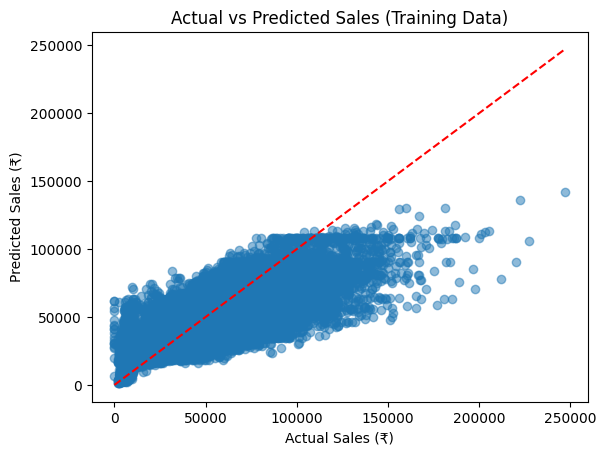

In [20]:
# Plot Actual vs Predicted (in original Sales scale)
import matplotlib.pyplot as plt

plt.scatter(y_train_actual, y_train_pred, alpha=0.5)
plt.plot([y_train_actual.min(), y_train_actual.max()],
         [y_train_actual.min(), y_train_actual.max()],
         'r--')
plt.xlabel('Actual Sales (₹)')
plt.ylabel('Predicted Sales (₹)')
plt.title('Actual vs Predicted Sales (Training Data)')
plt.show()

In [21]:
# Save the trained model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model trained and saved successfully!")

Model trained and saved successfully!


# Observations after choosing XGboost as final mode:

* loaded XGboost model into a new file 
* predicted sales while sales is scaled 
* loaded pickle file scalar and unscaled the sales feature to get accurate values 
* loaded the xgboost model into a pickle file for later deployment